# Vehicles Dataset
In this project the main goal is to have a thorough Exploratory Data Analysis and preliminary machine learning for the dataset

# Project Overview



1.   Understanding the shape of the data
2.   Data Cleaning
3.   Data Exploration
4.   Feature Engineering
5.   Data Preprocessing for Model
6.   Model Building
7.   Model Tuning
8.   Ensemble Model Building
9.   Results



## Importing of Libraries and Loading of the Dataset

In [85]:
# Import libraries and mount drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn as sks
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from google.colab import drive
#drive.mount('/content/drive')

## Project Planning

In [86]:
# Understand the nature of the data
# Value counts
# Histograms, boxplots, distplot, and heatmaps
# Missing data
# Explore data themes
# Feature engineering
# Data preprocessing
# Building the model
# Model comparison with CV

## Understand the Nature of the Dataset

In [87]:
# Load the dataset
vehicles = pd.read_csv('vehicles.csv', encoding = 'iso-8859-1')
vehicles.head(10)

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
0,0,7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600
5,5,7239776805,auburn,29590,2016.0,toyota,tacoma double cab sr5,good,6 cylinders,gas,33290.0,clean,other,3TMAZ5CN6GM020355,NaN,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-01T07:27:25-0600
6,6,7239425036,auburn,39990,2012.0,ford,mustang shelby gt500 coupe,good,8 cylinders,gas,9692.0,clean,other,1ZVBP8JS8C5240016,rwd,NaN,coupe,blue,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-11-30T13:34:00-0600
7,7,7238667661,auburn,41990,2012.0,chevrolet,camaro zl1 coupe 2d,good,8 cylinders,gas,2778.0,clean,other,2G1FS1EP4C9800609,rwd,NaN,coupe,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-11-29T07:39:33-0600
8,8,7238127696,auburn,31990,2017.0,jeep,wrangler unlimited sport s,good,6 cylinders,gas,29614.0,clean,other,1C4BJWDG9HL725235,4wd,NaN,other,NaN,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-11-28T07:21:09-0600
9,9,7237779886,auburn,490,2019.0,ford,transit connect wagon xlt,excellent,4 cylinders,gas,4775.0,clean,automatic,NM0GE9F22K1398142,NaN,NaN,van,NaN,2019 Ford Transit Connect Wagon XLT FOR ONLY $...,al,36.967357,-122.024254,2020-11-27T12:42:28-0600


In [88]:
# Check the information of the dataframe
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1999 non-null   int64  
 1   id            1999 non-null   int64  
 2   region        1999 non-null   object 
 3   price         1999 non-null   int64  
 4   year          1981 non-null   float64
 5   manufacturer  1870 non-null   object 
 6   model         1989 non-null   object 
 7   condition     1062 non-null   object 
 8   cylinders     1270 non-null   object 
 9   fuel          1978 non-null   object 
 10  odometer      1594 non-null   float64
 11  title_status  1903 non-null   object 
 12  transmission  1999 non-null   object 
 13  VIN           1204 non-null   object 
 14  drive         1386 non-null   object 
 15  size          563 non-null    object 
 16  type          1288 non-null   object 
 17  paint_color   1528 non-null   object 
 18  description   1999 non-null 

We can see that columns year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, VIN, drive, size, type, paint_color, lat, and long have missing values

In [89]:
# Describe the dataframe
vehicles.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,1999.000000,1.999000e+03,1.999000e+03,1981.000000,1594.000000,1988.000000,1988.000000
mean,999.000000,7.233550e+09,6.338826e+05,2010.304897,105611.558971,34.070190,-86.740015
std,577.205914,4.088379e+06,2.761232e+07,8.876022,75904.797424,2.368996,6.005261
min,0.000000,7.224722e+09,0.000000e+00,1911.000000,0.000000,1.241841,-122.509472
25%,499.500000,7.229896e+09,5.800000e+03,2007.000000,47887.000000,33.209824,-86.858340
50%,999.000000,7.233576e+09,1.298700e+04,2012.000000,99371.000000,33.520000,-86.783409
75%,1498.500000,7.236935e+09,2.399500e+04,2016.000000,152398.500000,34.205600,-86.279647
max,1998.000000,7.240596e+09,1.234568e+09,2020.000000,1000000.000000,48.432675,-74.281734


In [90]:
# Dop the Unnamed column
vehicles.drop(columns=['Unnamed: 0'], inplace=True)

## Light Data Exploration


In [91]:
# Make dataframe for numerical and categorical variables
vehicles_num = vehicles[['id', 'price', 'year', 'odometer', 'lat', 'long']]
vehicles_cat = vehicles.drop(columns=['id', 'price', 'year', 'odometer', 'lat', 'long', 'description', 'VIN'])

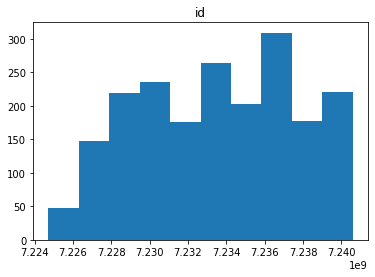

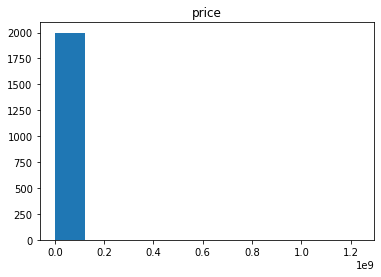

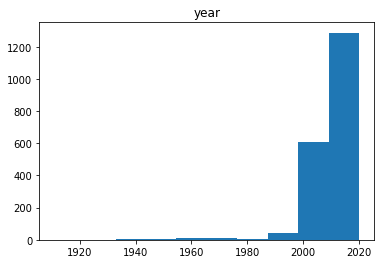

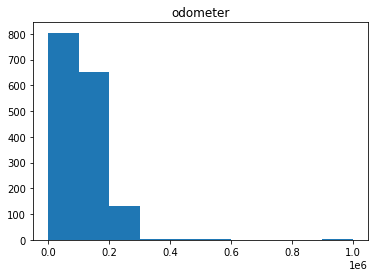

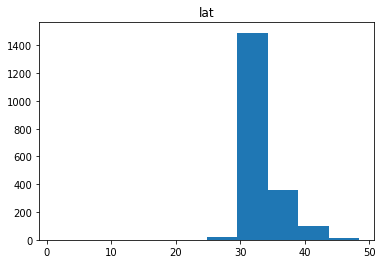

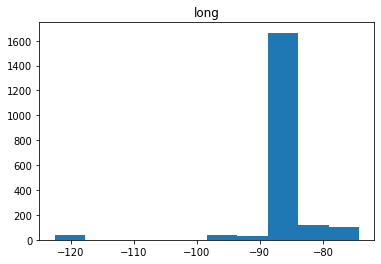

In [92]:
# Distribution for all the numeric variables
for column in vehicles_num.columns:
  plt.hist(vehicles_num[column])
  plt.title(column)
  plt.show()

                id     price      year  odometer       lat      long
id        1.000000 -0.022498 -0.011627  0.018268 -0.055386  0.153230
price    -0.022498  1.000000 -0.139949 -0.480425 -0.004090  0.000574
year     -0.011627 -0.139949  1.000000 -0.342541 -0.017921  0.043449
odometer  0.018268 -0.480425 -0.342541  1.000000 -0.057662  0.002819
lat      -0.055386 -0.004090 -0.017921 -0.057662  1.000000  0.025649
long      0.153230  0.000574  0.043449  0.002819  0.025649  1.000000


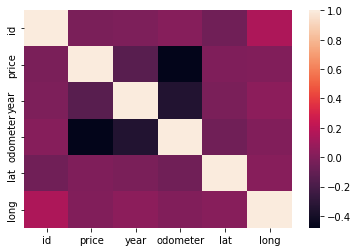

In [93]:
# Heatmap
print(vehicles_num.corr())
sns.heatmap(vehicles_num.corr())

We can see that year, odometer, and lat has higher correlation

In [94]:
# Compare price across the features
pd.pivot_table(vehicles, index='price', values=['year', 'odometer', 'lat', 'long'])

,lat,long,odometer,year
price,,,,
0,34.181595,-85.937619,46397.428571,2013.222222
1,34.066767,-87.101333,NaN,2009.333333
4,33.124800,-86.862200,88000.000000,1961.000000
199,33.481600,-86.859000,NaN,2017.000000
250,33.588400,-86.959700,NaN,1981.000000
...,...,...,...,...
109000,33.653900,-85.838200,NaN,2018.000000
119900,33.653900,-85.838200,NaN,2019.000000
123456,36.243300,-94.082700,NaN,1963.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


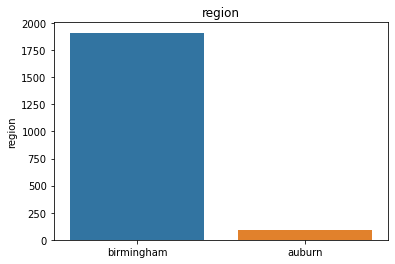

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


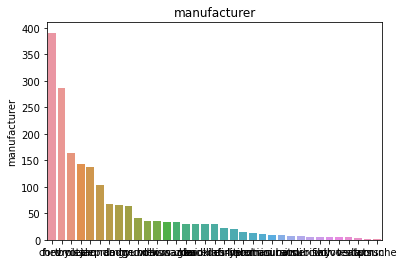

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


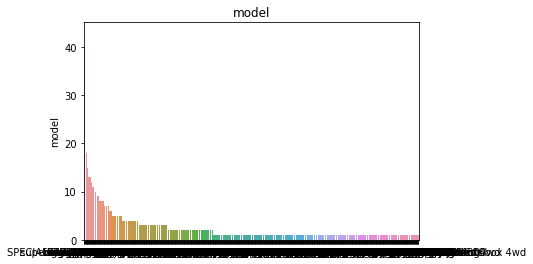

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


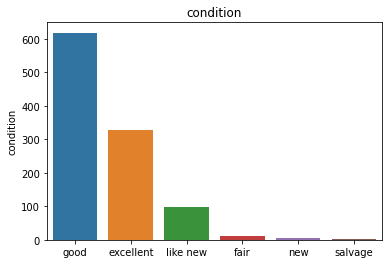

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


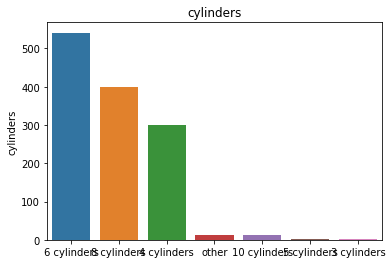

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


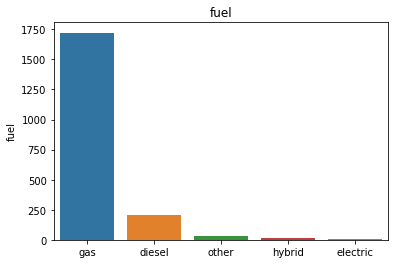

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


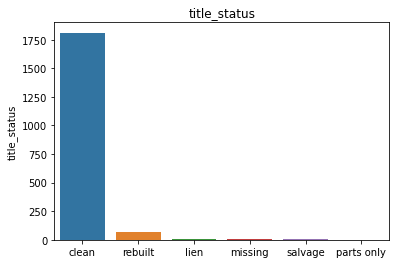

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


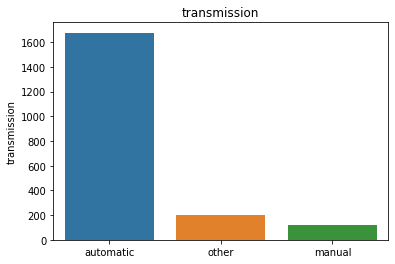

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


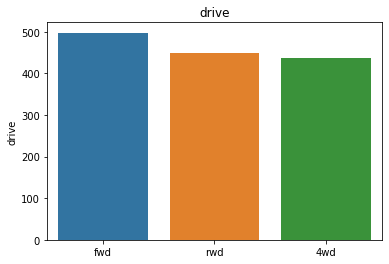

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


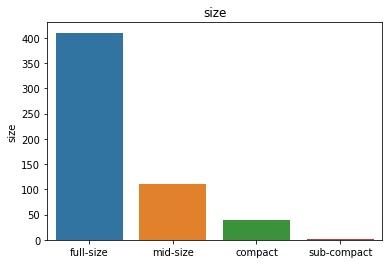

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


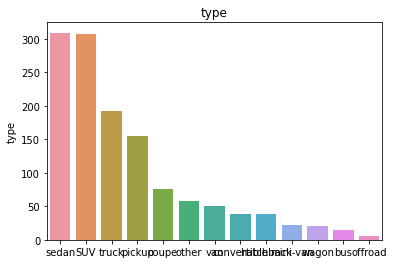

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


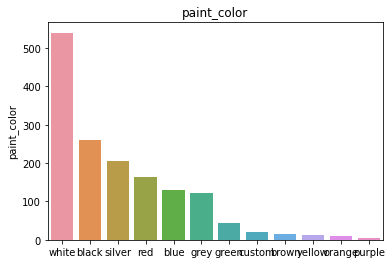

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


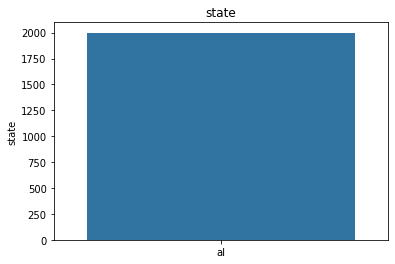

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


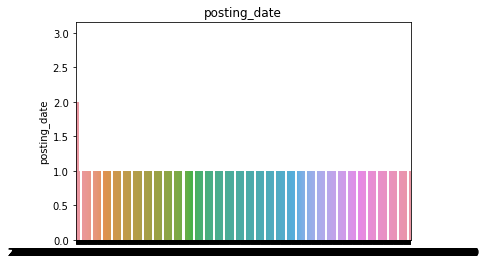

In [95]:
# Distribution of categorical features
for column in vehicles_cat.columns:
  sns.barplot(vehicles_cat[column].value_counts().index, vehicles_cat[column].value_counts()).set_title(column)
  plt.show()

## Feature Engineering

In [96]:
vehicles_cat.type
vehicles['type_multiple'] = vehicles.type.apply(lambda x: 0 if pd.isna(x) else x)
vehicles['type_multiple'].value_counts()

0              711
sedan          309
SUV            307
truck          192
pickup         155
coupe           76
other           58
van             51
convertible     39
hatchback       39
mini-van        22
wagon           20
bus             15
offroad          5
Name: type_multiple, dtype: int64

We can see that there are 711 null values for type

In [97]:
vehicles_cat.model
vehicles['model_multiple'] = vehicles.model.apply(lambda x: 0 if pd.isna(x) else x)
vehicles['model_multiple'].value_counts()

wrangler                  43
altima                    40
f-150                     23
camry                     22
silverado 1500            20
                          ..
gold tdi                   1
raider                     1
500 l                      1
express 1500 cargo van     1
Hino 268                   1
Name: model_multiple, Length: 822, dtype: int64

In [98]:
vehicles_cat.manufacturer
vehicles['manufacturer_multiple'] = vehicles.manufacturer.apply(lambda x: 0 if pd.isna(x) else x)
vehicles['manufacturer_multiple'].value_counts()

ford             391
chevrolet        287
toyota           163
nissan           143
jeep             137
0                129
honda            104
ram               68
dodge             66
gmc               63
hyundai           42
bmw               36
lexus             35
mazda             34
volkswagen        34
kia               30
buick             29
cadillac          29
mercedes-benz     29
infiniti          23
chrysler          20
lincoln           14
pontiac           12
mini              11
subaru            10
acura             10
audi               8
mitsubishi         7
mercury            6
fiat               6
tesla              5
volvo              5
rover              5
saturn             4
porsche            2
datsun             2
Name: manufacturer_multiple, dtype: int64

There are 129 null values for manufacturer

In [99]:
vehicles_cat.posting_date
vehicles['posting_date_multiple'] = vehicles.posting_date.apply(lambda x: 0 if pd.isna(x) else x)
vehicles['posting_date_multiple'].value_counts()

2020-11-12T08:55:27-0600    3
2020-11-09T08:49:25-0600    3
2020-12-01T17:18:40-0600    2
2020-12-01T17:18:29-0600    2
2020-11-14T14:16:49-0600    2
                           ..
2020-11-16T09:45:49-0600    1
2020-11-25T08:32:38-0600    1
2020-11-22T10:43:31-0600    1
2020-11-29T15:44:44-0600    1
2020-12-01T14:59:32-0600    1
Name: posting_date_multiple, Length: 1976, dtype: int64

## Data Preprocessing for Model

1. Drop null values for columns in small null value quantities
2. Determine relevant features
3. Do categorical transforms on all data
4. Impute missing data for numerical variables
5. Normalize columns with extreme skewness using logarithm
6. Scale numerical variables

In [100]:
# Drop null values
null_to_delete = ['year', 'manufacturer', 'model', 'fuel', 'lat', 'long']

for item in null_to_delete:
  vehicles.dropna(subset=[item], inplace=True)

vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1833 entries, 0 to 1997
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1833 non-null   int64  
 1   region                 1833 non-null   object 
 2   price                  1833 non-null   int64  
 3   year                   1833 non-null   float64
 4   manufacturer           1833 non-null   object 
 5   model                  1833 non-null   object 
 6   condition              976 non-null    object 
 7   cylinders              1163 non-null   object 
 8   fuel                   1833 non-null   object 
 9   odometer               1480 non-null   float64
 10  title_status           1756 non-null   object 
 11  transmission           1833 non-null   object 
 12  VIN                    1114 non-null   object 
 13  drive                  1284 non-null   object 
 14  size                   502 non-null    object 
 15  type

In [101]:
# Drop irrelevant columns
drop_columns = ['VIN', 'description', 'state', 'size']
for item in drop_columns:
  vehicles.drop(columns=item, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


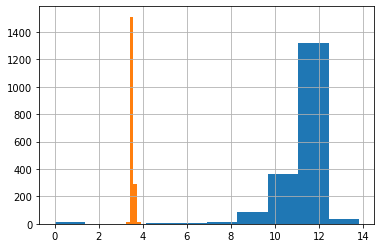

In [112]:
# Impute continuous variables
vehicles.odometer = vehicles.odometer.fillna(vehicles.odometer.median())

# Impute categorical variables
#vehicles.type = vehicles.type.fillna('sedan', inplace=True)
#vehicles.cylinders = vehicles.cylinders.fillna('other', inplace=True)
#vehicles.title_status = vehicles.title_status.fillna('rebuilt', inplace=True)
#vehicles.drive = vehicles.drive.fillna('fwd', inplace=True)
#vehicles.paint_color = vehicles.paint_color.fillna('white', inplace=True)

vehicles = vehicles.fillna(value={'type': 'sedan', 'cylinders': 'other', 'title_status': 'rebuilt', 'drive': 'fwd', 
                                  'paint_color': 'white'})

# Logarithmic normalization
vehicles['norm_odometer'] = np.log(vehicles.odometer + 1)
vehicles['norm_odometer'].hist()

vehicles['norm_lat'] = np.log(vehicles.lat + 1)
vehicles['norm_lat'].hist()

vehicles['norm_long'] = np.log(vehicles.long + 1)
vehicles['norm_long'].hist()

plt.show()

In [113]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,lat,long,posting_date,type_multiple,model_multiple,manufacturer_multiple,posting_date_multiple,norm_odometer,norm_lat,norm_long
0,7240372487,auburn,35990,2010.0,chevrolet,corvette grand sport,good,other,gas,32742.0,rebuilt,other,fwd,sedan,white,32.590000,-85.480000,2020-12-02T08:11:30-0600,other,corvette grand sport,chevrolet,2020-12-02T08:11:30-0600,10.396444,3.514228,NaN
1,7240309422,auburn,7500,2014.0,hyundai,sonata,excellent,other,gas,93600.0,rebuilt,automatic,fwd,sedan,white,32.547500,-85.468200,2020-12-02T02:11:50-0600,sedan,sonata,hyundai,2020-12-02T02:11:50-0600,11.446796,3.512962,NaN
2,7240224296,auburn,4900,2006.0,bmw,x3 3.0i,good,other,gas,87046.0,rebuilt,automatic,fwd,sedan,white,32.616807,-85.464149,2020-12-01T19:50:41-0600,SUV,x3 3.0i,bmw,2020-12-01T19:50:41-0600,11.374203,3.515026,NaN
3,7240103965,auburn,2000,1974.0,chevrolet,c-10,good,other,gas,190000.0,rebuilt,automatic,fwd,sedan,white,32.861600,-85.216100,2020-12-01T15:54:45-0600,pickup,c-10,chevrolet,2020-12-01T15:54:45-0600,12.154785,3.522282,NaN
4,7239983776,auburn,19500,2005.0,ford,f350 lariat,excellent,other,diesel,116000.0,rebuilt,automatic,fwd,sedan,white,32.547500,-85.468200,2020-12-01T12:53:56-0600,pickup,f350 lariat,ford,2020-12-01T12:53:56-0600,11.661354,3.512962,NaN


In [114]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1833 entries, 0 to 1997
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1833 non-null   int64  
 1   region                 1833 non-null   object 
 2   price                  1833 non-null   int64  
 3   year                   1833 non-null   float64
 4   manufacturer           1833 non-null   object 
 5   model                  1833 non-null   object 
 6   condition              976 non-null    object 
 7   cylinders              1833 non-null   object 
 8   fuel                   1833 non-null   object 
 9   odometer               1833 non-null   float64
 10  title_status           1833 non-null   object 
 11  transmission           1833 non-null   object 
 12  drive                  1833 non-null   object 
 13  type                   1833 non-null   object 
 14  paint_color            1833 non-null   object 
 15  lat 

In [116]:
# Set X and y
X = vehicles.drop(columns=['id', 'condition', 'type_multiple', 'model_multiple', 'manufacturer_multiple', 
                  'posting_date_multiple', 'lat', 'long', 'odometer'])

y = vehicles['price']

In [119]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [120]:
# Select columns
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

cat_columns_train = cat_selector(X_train)
cat_columns_test = cat_selector(X_test)
num_columns_train = num_selector(X_train)
num_columns_test = num_selector(X_test)

cat_data_train = X_train[cat_columns_train]
cat_data_test = X_test[cat_columns_test]
num_data_train = X_train[num_columns_train]
num_data_test = X_test[num_columns_test]

In [122]:
# Instantiate OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the categorical values to the ohe
ohe_train = ohe.fit_transform(cat_data_train)
ohe_test = ohe.transform(cat_data_test)

# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit the scaler
train_scale = scaler.fit_transform(num_data_train)
test_scale = scaler.transform(num_data_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


In [124]:
# Make a pipeline
pipe = Pipeline(
    steps=(['OneHotEncoder', ohe], ['Standard Scaler', scaler])
)

# Make a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", pipe, num_selector),
        ("cat", pipe, cat_selector),
    ]
)

In [125]:
# Fit with the Xtrain
X_train = pd.DataFrame(preprocessor.fit_transform(X_train))

# Fit transformer with the Xtest
X_test = pd.DataFrame(preprocessor.transform(X_test))

## Modelling

### Random Forest Regressor

In [127]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# Instantiate Random Forest
rf = RandomForestRegressor(random_state=101)

In [128]:
# Create a pipeline for the random forest
rf_pipe = Pipeline(
    steps=[('preprocessor', preprocessor), ('random forest', rf)]
)

In [129]:
# Fit the model with the training data
rf_pipe.fit(X_train, y_train)

# Predict with the test set
rf_pipe.predict(X_test)

array([39314.73, 13144.13, 27121.92,  4547.87,  4231.65, 23264.52,
       31600.  , 21364.8 ,  6466.85, 20146.19, 10433.4 , 12701.75,
       36956.23, 21350.  ,  6150.53, 12870.2 , 10879.3 , 10236.29,
       18951.92,  8633.  ,  4035.36, 22484.78, 18951.24, 12626.76,
        6563.74,  4646.93, 13614.3 ,  6604.37, 23535.6 ,  8491.92,
        5782.55,  3284.83,  6444.8 , 33338.48, 17694.62, 18936.28,
        8187.63, 21165.77,  4727.78,  5816.53, 15186.1 , 11383.35,
       37271.66,  9624.59, 17472.23, 11920.71,  4697.43,  3991.41,
        3820.93,  5856.5 , 15798.1 , 10062.76, 29034.59, 10791.83,
        4898.1 ,  5352.95,  1002.92, 23428.06, 27649.84, 13913.54,
        6456.35, 13018.81, 24389.7 , 19025.8 ,  5646.44, 11849.02,
       54729.  , 32997.66, 27071.94, 30742.67, 43447.89, 20487.3 ,
        7641.98, 11442.  , 10621.34, 24696.  ,  6052.96, 23880.  ,
        7561.08,  1504.33,  8139.65, 23016.55, 27490.  ,  7247.88,
        3848.82,  3932.49,  3636.95,  3642.89, 22411.35, 35139

In [130]:
# Evaluate the model
rf_train_score = rf_pipe.score(X_train, y_train)
rf_test_score = rf_pipe.score(X_test, y_test)
print(f"Train score is {rf_train_score}")
print(f"Test score is {rf_test_score}")

print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, rf_pipe.predict(X_train)))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, rf_pipe.predict(X_test)))}')

Train score is 0.9455914618395126
Test score is 0.6565078819156203
Train RMSE: 3241.9096303312717
Test RMSE: 7279.5743407097825


### XGBoost Regressor

In [131]:
# Import the model
from xgboost import XGBRegressor

# Instantiate the model
xgb_reg = XGBRegressor()

In [132]:
# Make a pipeline
xgb_reg_pipe = Pipeline(
    steps=(['preprocessor', preprocessor], ['XGBoost Regressor', xgb_reg])
)

# Fit the model
xgb_reg_pipe.fit(X_train, y_train)

# Predict
xgb_reg_predictions_train = xgb_reg_pipe.predict(X_train)
xgb_reg_predictions_test = xgb_reg_pipe.predict(X_test)

[14:38:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [133]:
# Evaluate the model
xgb_reg_score_train = r2_score(y_train, xgb_reg_predictions_train)
print(f"The score of training set is {xgb_reg_score_train}")

xgb_reg_score_test = r2_score(y_test, xgb_reg_predictions_test)
print(f"The score of training set is {xgb_reg_score_test}")

The score of training set is 0.7456399435086851
The score of training set is 0.5777805187461522
